In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

In [74]:
train = pd.read_csv(r'C:\Users\Admin\Desktop\Credit Risk Scorecard\data\cs-training.csv')
test = pd.read_csv(r'C:\Users\Admin\Desktop\Credit Risk Scorecard\data\cs-test.csv')
information = pd.read_excel(r'C:\Users\Admin\Desktop\Credit Risk Scorecard\data\Data Dictionary.xls')


In [75]:
print('Columns in Training file:')
print(train.columns)
print('\n')
print('Columns in Test file:')
print(test.columns)

Columns in Training file:
Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


Columns in Test file:
Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


In [76]:
print('Description of columns:')
c = 0
for varname,description,type in information.values:
    print(c,end='. ')
    print('[','Variable Name:',varname,end=' | ')
    print('Description:',description,end=' | ')
    print('Type:',type,']')
    c+=1

Description of columns:
0. [ Variable Name: Variable Name | Description: Description | Type: Type ]
1. [ Variable Name: SeriousDlqin2yrs | Description: Person experienced 90 days past due delinquency or worse  | Type: Y/N ]
2. [ Variable Name: RevolvingUtilizationOfUnsecuredLines | Description: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits | Type: percentage ]
3. [ Variable Name: age | Description: Age of borrower in years | Type: integer ]
4. [ Variable Name: NumberOfTime30-59DaysPastDueNotWorse | Description: Number of times borrower has been 30-59 days past due but no worse in the last 2 years. | Type: integer ]
5. [ Variable Name: DebtRatio | Description: Monthly debt payments, alimony,living costs divided by monthy gross income | Type: percentage ]
6. [ Variable Name: MonthlyIncome | Description: Monthly income | Type: real ]
7. [ Variable Name: NumberOfOpenCreditLinesAndLoan

In [77]:
train.drop('Unnamed: 0',axis=1,inplace=True)
print(train.shape)
train

(150000, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [78]:
test.drop('Unnamed: 0',axis=1,inplace=True)
print(test.shape)
test

(101503, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101498,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


<Axes: >

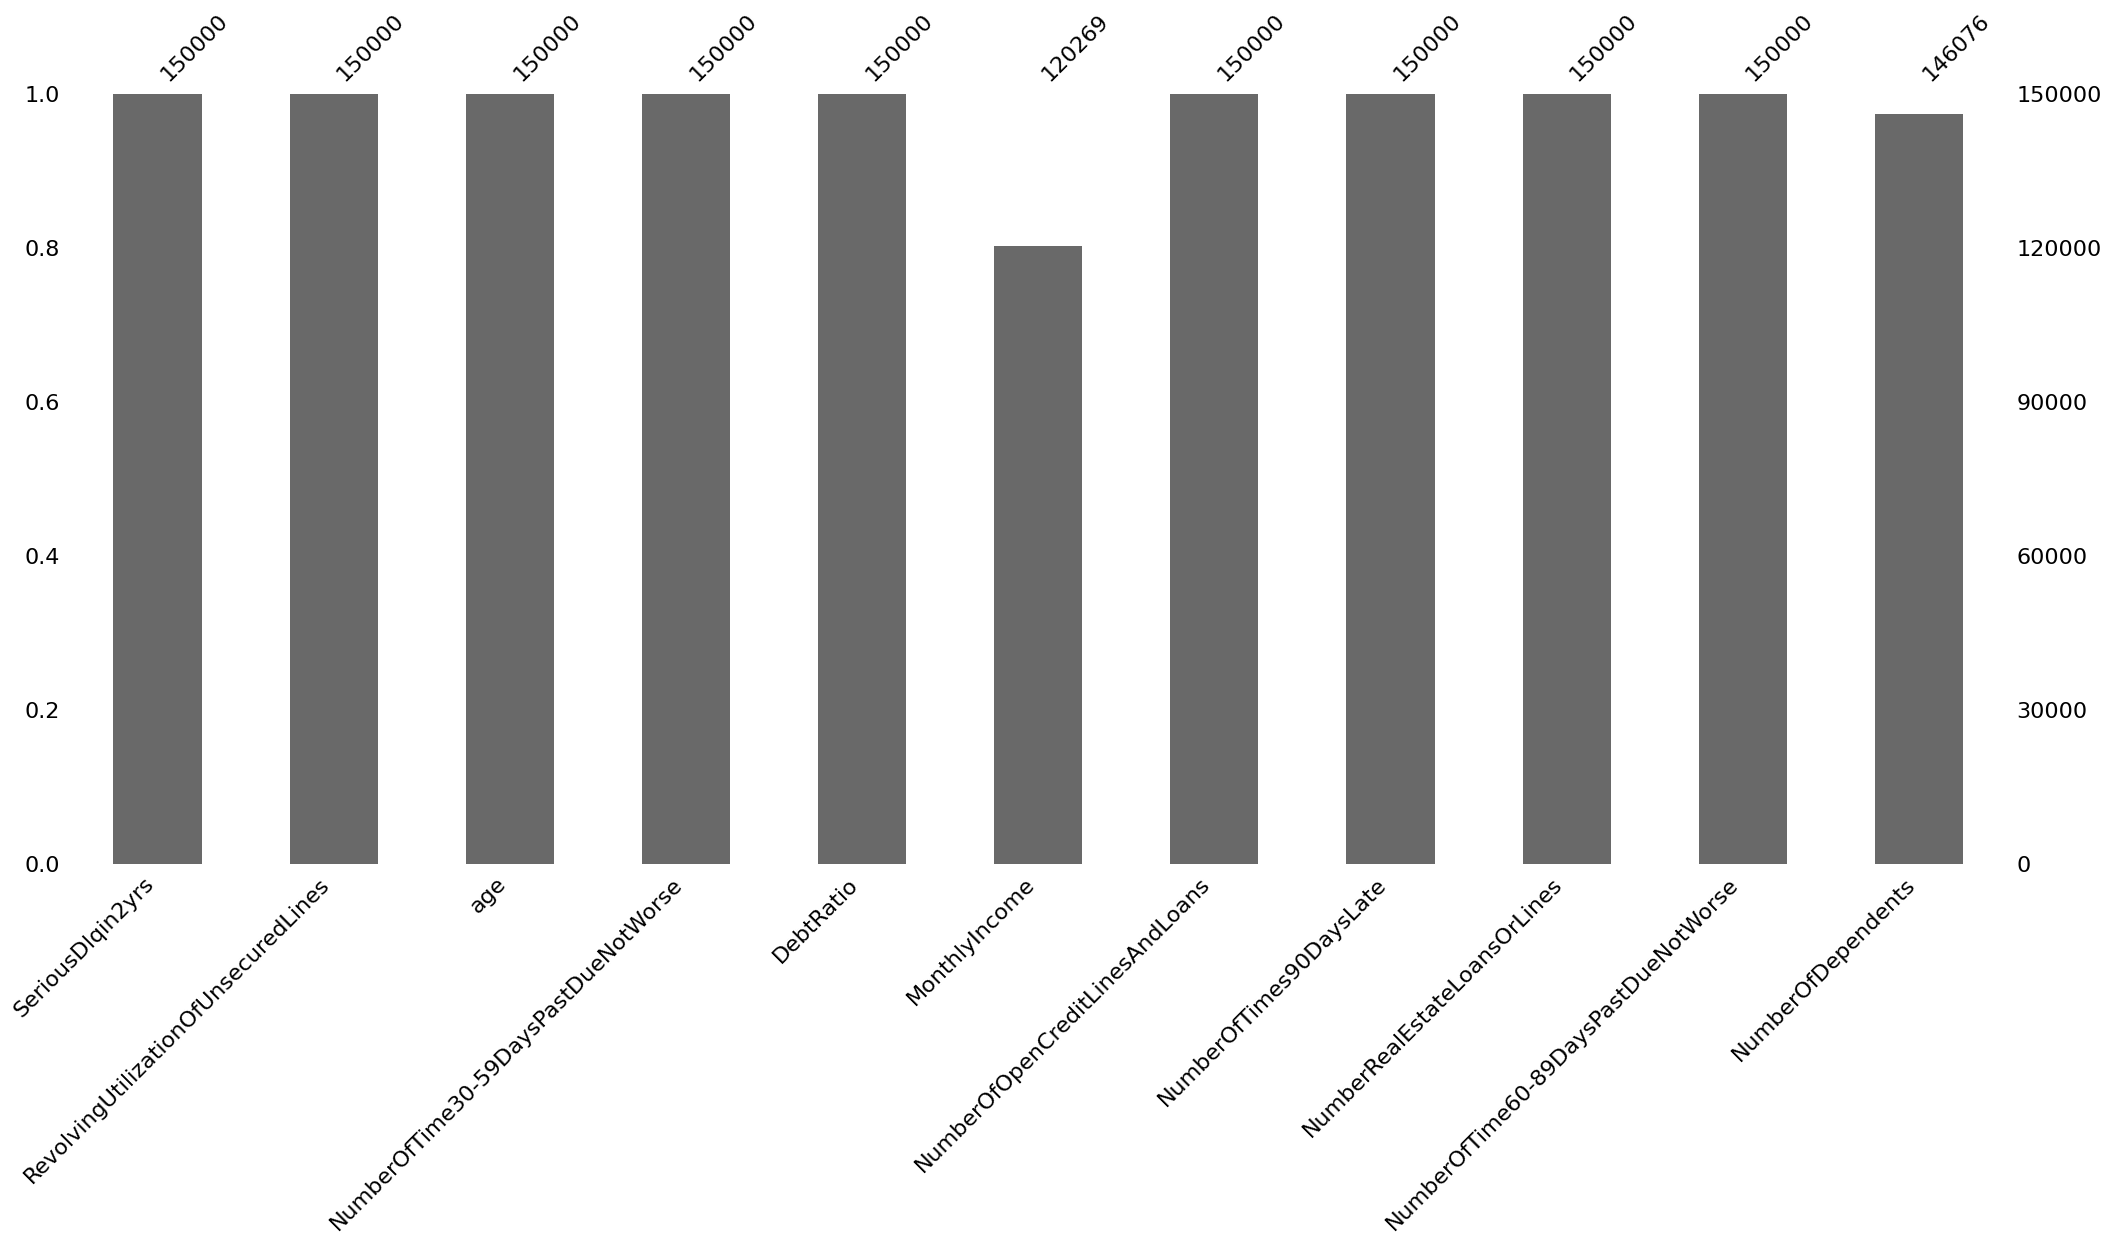

In [79]:
ms.bar(train)

In [80]:
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


<Axes: >

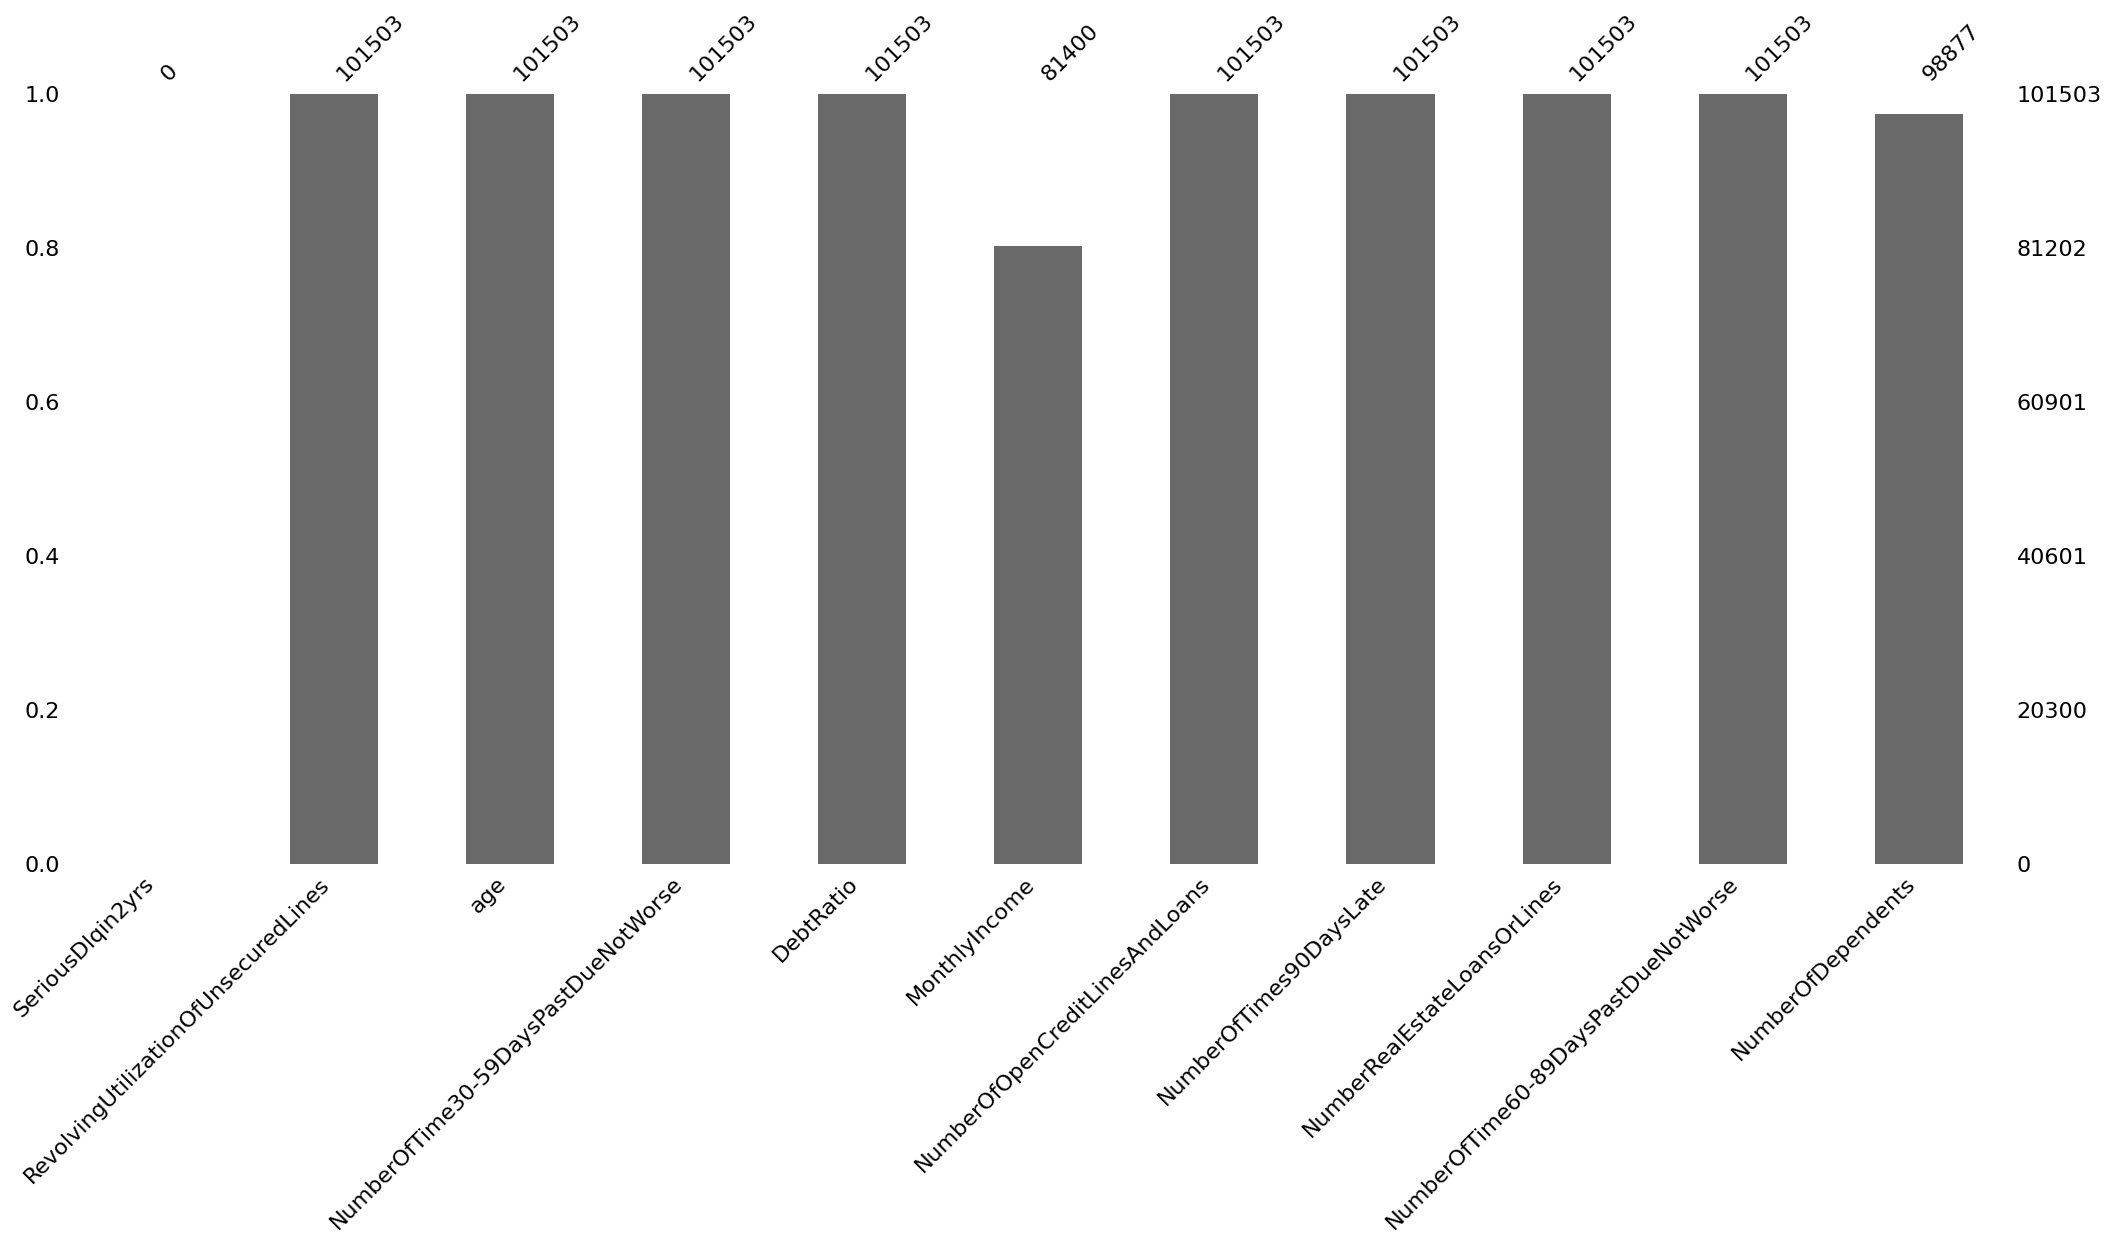

In [81]:
ms.bar(test)

In [82]:
test.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [83]:
train_mi = train['MonthlyIncome'].isna().sum()/len(train['MonthlyIncome'])
train_de = train['NumberOfDependents'].isna().sum()/len(train['NumberOfDependents'])
test_mi = test['MonthlyIncome'].isna().sum()/len(test['MonthlyIncome'])
test_de = test['NumberOfDependents'].isna().sum()/len(test['NumberOfDependents'])

print('Training:')
print('Missing data in Monthly Income: ',train_mi)
print('Missing data in Number of Dependants: ',train_de)
print('-'*100)
print('Test:')
print('Missing data in Monthly Income: ',test_mi)
print('Missing data in Number of Dependents: ',test_de)


Training:
Missing data in Monthly Income:  0.19820666666666667
Missing data in Number of Dependants:  0.02616
----------------------------------------------------------------------------------------------------
Test:
Missing data in Monthly Income:  0.19805325950957114
Missing data in Number of Dependents:  0.025871156517541353


EDA for SeriousDlqin2yrs:
Training Data:
count    150000.000000
mean          0.066840
std           0.249746
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64


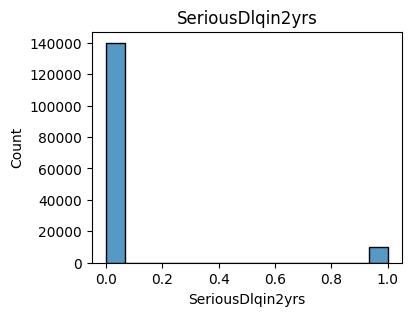

----------------------------------------------------------------------------------------------------
Test Data:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: SeriousDlqin2yrs, dtype: float64


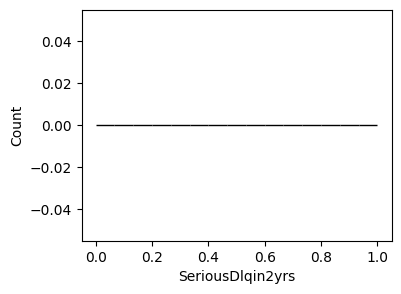

-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
EDA for RevolvingUtilizationOfUnsecuredLines:
Training Data:
count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64


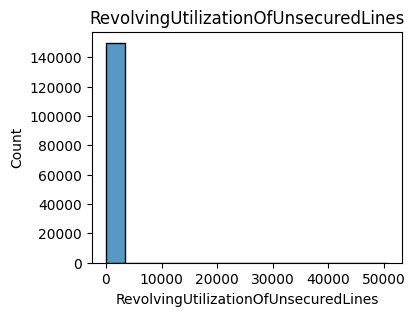

----------------------------------------------------------------------------------------------------
Test Data:
count    101503.000000
mean          5.310000
std         196.156039
min           0.000000
25%           0.030131
50%           0.152586
75%           0.564225
max       21821.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64


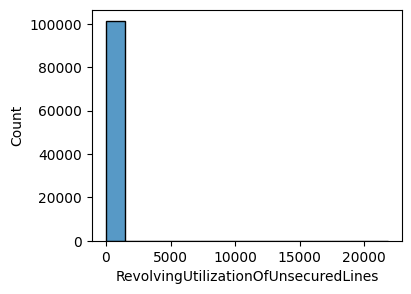

-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
EDA for age:
Training Data:
count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64


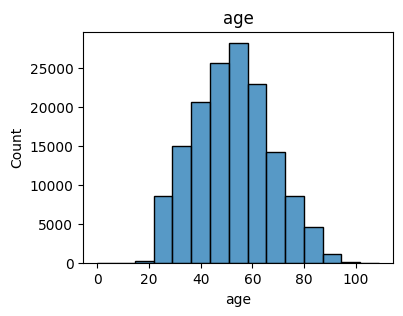

----------------------------------------------------------------------------------------------------
Test Data:
count    101503.000000
mean         52.405436
std          14.779756
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         104.000000
Name: age, dtype: float64


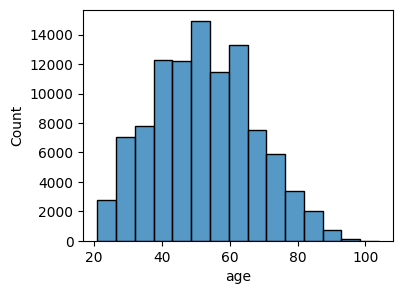

-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
EDA for NumberOfTime30-59DaysPastDueNotWorse:
Training Data:
count    150000.000000
mean          0.421033
std           4.192781
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64


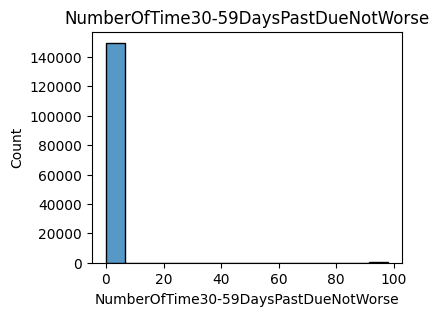

----------------------------------------------------------------------------------------------------
Test Data:
count    101503.000000
mean          0.453770
std           4.538487
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64


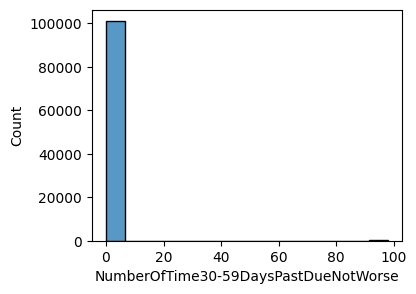

-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
EDA for DebtRatio:
Training Data:
count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64


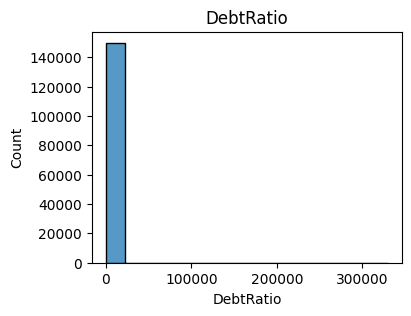

----------------------------------------------------------------------------------------------------
Test Data:
count    101503.000000
mean        344.475020
std        1632.595231
min           0.000000
25%           0.173423
50%           0.364260
75%           0.851619
max      268326.000000
Name: DebtRatio, dtype: float64


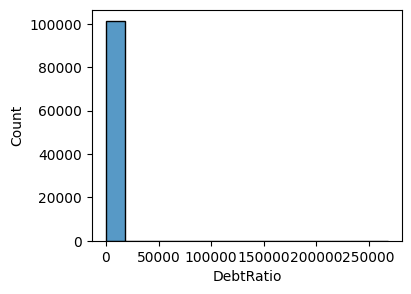

-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
EDA for MonthlyIncome:
Training Data:
count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64


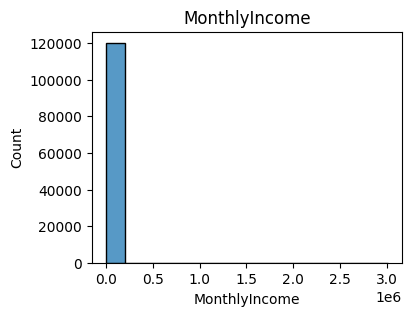

----------------------------------------------------------------------------------------------------
Test Data:
count    8.140000e+04
mean     6.855036e+03
std      3.650860e+04
min      0.000000e+00
25%      3.408000e+03
50%      5.400000e+03
75%      8.200000e+03
max      7.727000e+06
Name: MonthlyIncome, dtype: float64


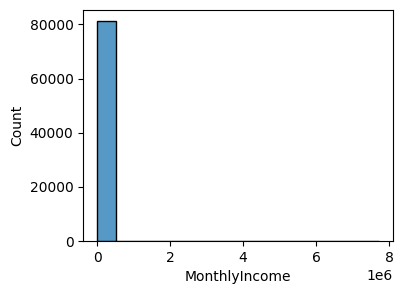

-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
EDA for NumberOfOpenCreditLinesAndLoans:
Training Data:
count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64


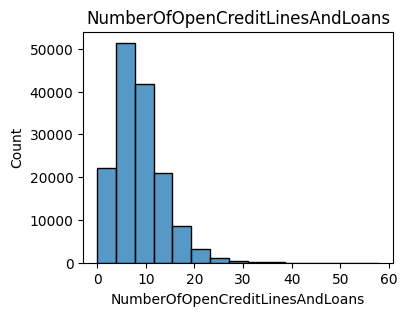

----------------------------------------------------------------------------------------------------
Test Data:
count    101503.000000
mean          8.453514
std           5.144100
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          85.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64


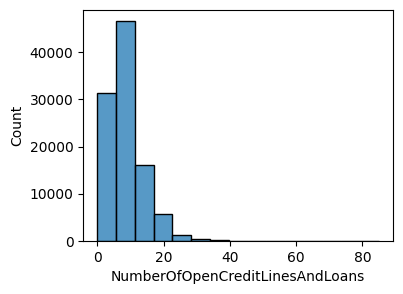

-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
EDA for NumberOfTimes90DaysLate:
Training Data:
count    150000.000000
mean          0.265973
std           4.169304
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64


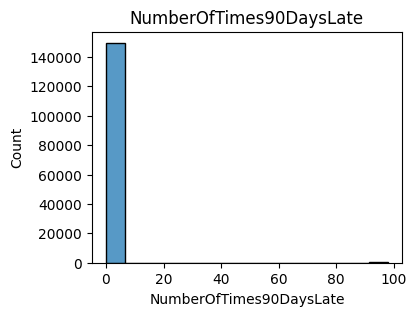

----------------------------------------------------------------------------------------------------
Test Data:
count    101503.000000
mean          0.296691
std           4.515859
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64


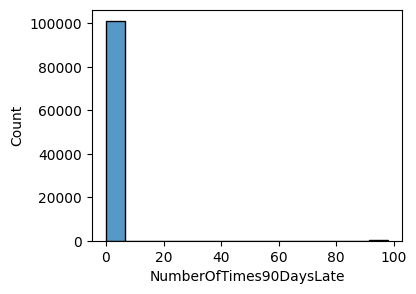

-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
EDA for NumberRealEstateLoansOrLines:
Training Data:
count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64


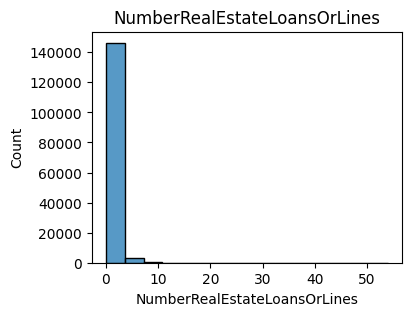

----------------------------------------------------------------------------------------------------
Test Data:
count    101503.000000
mean          1.013074
std           1.110253
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          37.000000
Name: NumberRealEstateLoansOrLines, dtype: float64


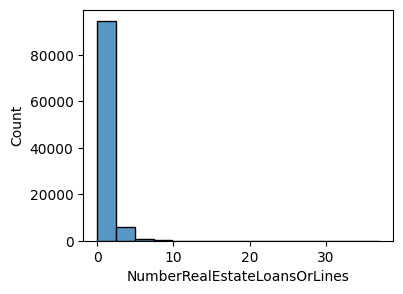

-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
EDA for NumberOfTime60-89DaysPastDueNotWorse:
Training Data:
count    150000.000000
mean          0.240387
std           4.155179
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64


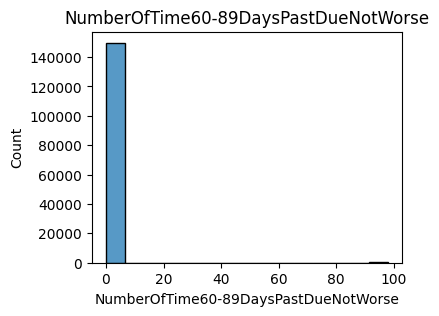

----------------------------------------------------------------------------------------------------
Test Data:
count    101503.000000
mean          0.270317
std           4.503578
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64


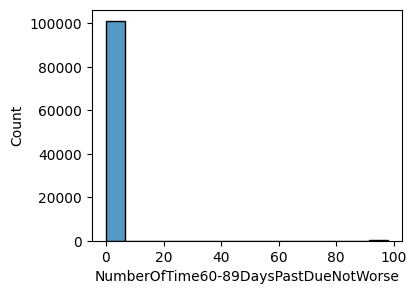

-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
EDA for NumberOfDependents:
Training Data:
count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64


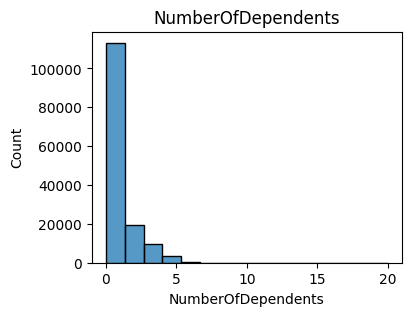

----------------------------------------------------------------------------------------------------
Test Data:
count    98877.000000
mean         0.769046
std          1.136778
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         43.000000
Name: NumberOfDependents, dtype: float64


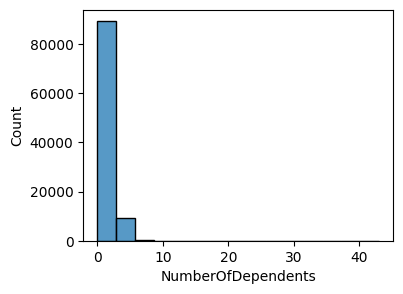

-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|


In [84]:
columns = ['SeriousDlqin2yrs','RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines',''
'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']

for i in columns:
    print('EDA for '+i+':')
    print("Training Data:")
    print(train[i].describe())
    plt.figure(figsize=(4,3))
    sns.histplot(data=train,x=i,bins=15)
    plt.title(i)
    plt.show()
    print('-'*100)
    print('Test Data:')
    print(test[i].describe())
    plt.figure(figsize=(4,3))
    sns.histplot(data=test,x=i,bins=15)
    plt.show()
    print('-|'*60)

<Axes: title={'center': 'Heatmap of Training Data'}>

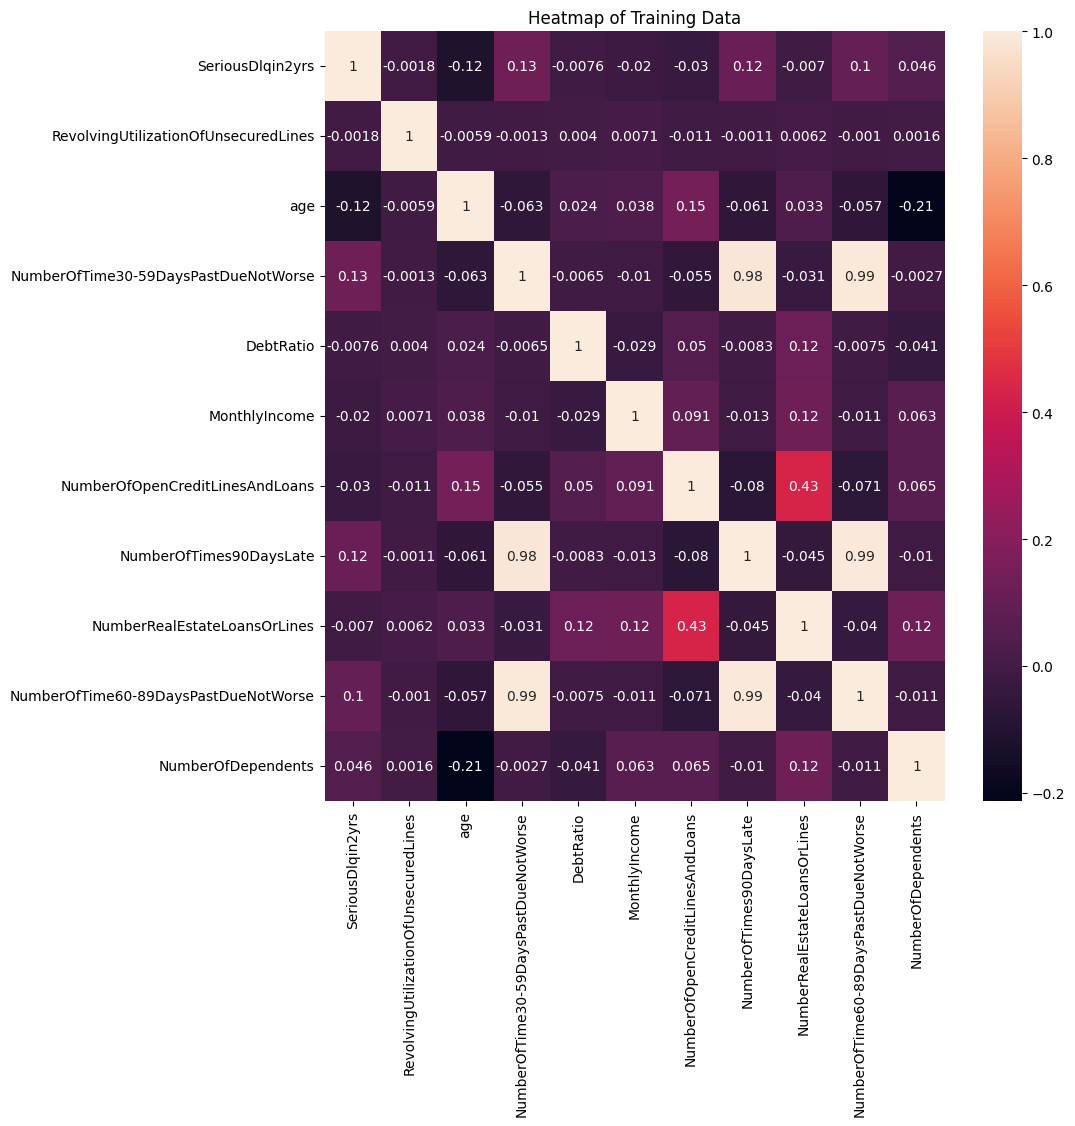

In [85]:
plt.figure(figsize=(10,10))
plt.title('Heatmap of Training Data')
sns.heatmap(train[columns].corr(),annot=True)

<Axes: title={'center': 'Heatmap of Test Data'}>

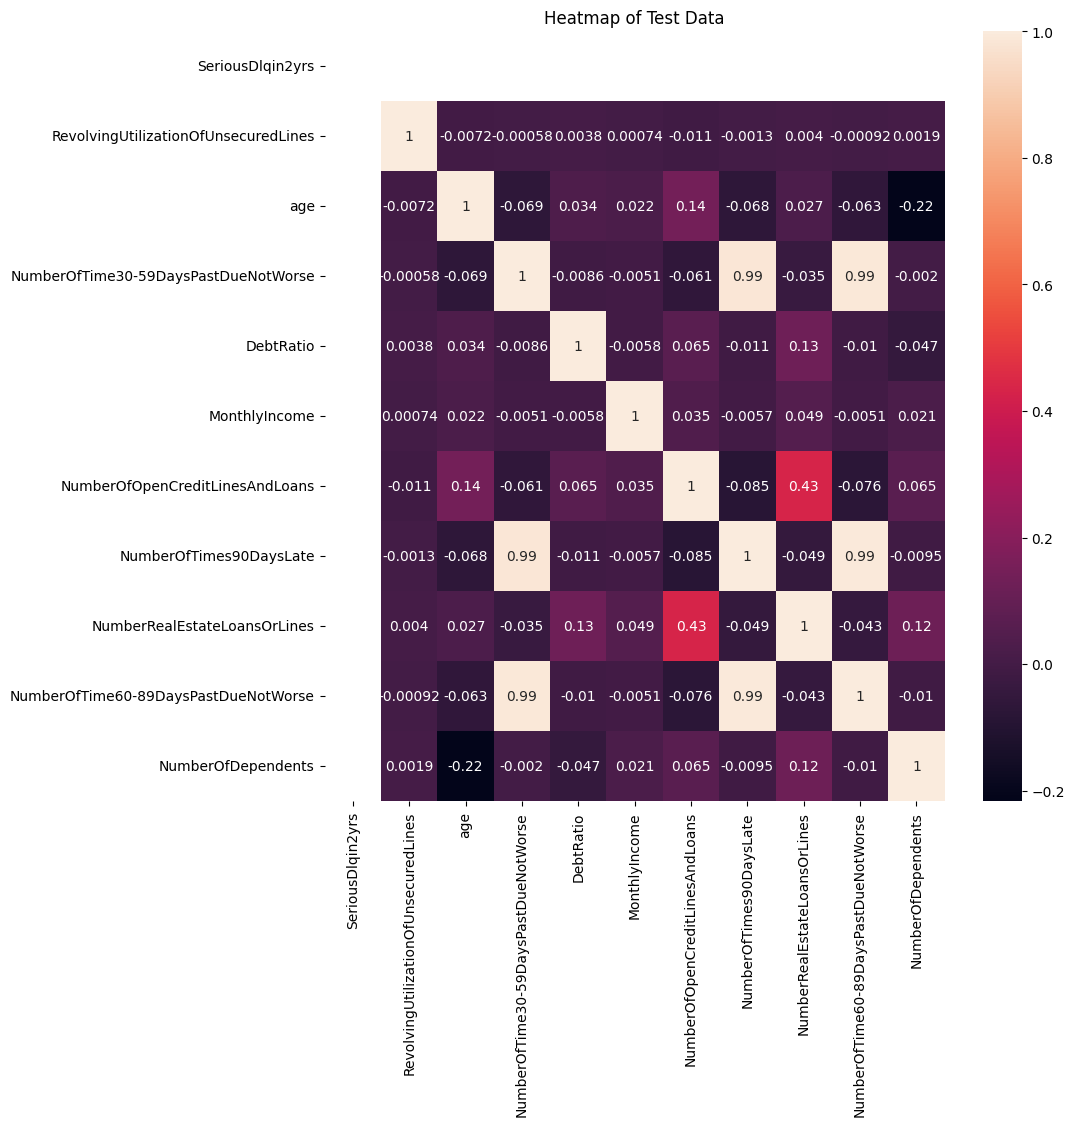

In [86]:
plt.figure(figsize=(10,10))
plt.title('Heatmap of Test Data')
sns.heatmap(test[columns].corr(),annot=True)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:1281: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


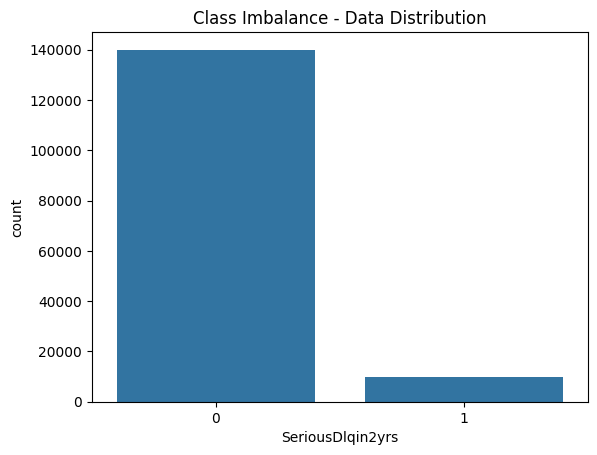

In [87]:
sns.countplot(x='SeriousDlqin2yrs',data=train)
plt.title('Class Imbalance - Data Distribution')
plt.show()

In [88]:
train_mi_mean = train['MonthlyIncome'].mean()
train_de_mode = train['NumberOfDependents'].mode().iloc[0]
train.fillna({'MonthlyIncome':train_mi_mean,'NumberOfDependents':train_de_mode},inplace=True)

In [89]:
test_mi_mean = test['MonthlyIncome'].mean()
test_de_mode = test['NumberOfDependents'].mode().iloc[0]
test.fillna({'MonthlyIncome':test_mi_mean,'NumberOfDependents':test_de_mode},inplace=True)

In [90]:
print('Training Data:')
print(train.isna().sum())
print('-'*100)
print('Test Data:')
print(test.isna().sum())

Training Data:
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64
----------------------------------------------------------------------------------------------------
Test Data:
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansO

In [91]:
from sklearn.preprocessing import MinMaxScaler
print('Before Scaling(Train):')
train.describe()

Before Scaling(Train):


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [92]:
print('Before Scaling(Test):')
test.describe()

Before Scaling(Test):


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,1.015030e+05,101503.000000,101503.000000,101503.000000,101503.000000,101503.00000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.74915
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.269395e+04,5.144100,4.515859,1.110253,4.503578,1.12860
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.900000e+03,5.000000,0.000000,0.000000,0.000000,0.00000
50%,NaN,0.152586,52.000000,0.000000,0.364260,6.583000e+03,8.000000,0.000000,1.000000,0.000000,0.00000
75%,NaN,0.564225,63.000000,0.000000,0.851619,7.374000e+03,11.000000,0.000000,2.000000,0.000000,1.00000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.00000


In [93]:
columns_new = ['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines',''
'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train[columns_new])
scaled_train = pd.DataFrame(scaled_train,columns=columns_new)
scaled_test = scaler.fit_transform(test[columns_new])
scaled_test = pd.DataFrame(scaled_test,columns=columns_new)
print('After Scaling(Train):')
scaled_train.describe()

After Scaling(Train):


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,1.500000e+05,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,1.192798e-04,0.479773,0.004296,1.070803e-03,0.002217,0.145737,0.002714,0.018856,0.002453,0.036871
std,4.925364e-03,0.135522,0.042783,6.181502e-03,0.004281,0.088723,0.042544,0.020922,0.042400,0.055351
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.890085e-07,0.376147,0.000000,5.310675e-07,0.001297,0.086207,0.000000,0.000000,0.000000,0.000000
50%,3.040560e-06,0.477064,0.000000,1.111762e-06,0.002194,0.137931,0.000000,0.018519,0.000000,0.000000
75%,1.102481e-05,0.577982,0.000000,2.633754e-06,0.002459,0.189655,0.000000,0.037037,0.000000,0.050000
max,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
print('After Scaling(Test):')
scaled_test.describe()

After Scaling(Test):


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,101503.000000,101503.000000,1.015030e+05,101503.000000,101503.000000,101503.000000,101503.000000,101503.000000,101503.000000
mean,0.000243,0.378379,0.004630,1.283793e-03,0.000887,0.099453,0.003027,0.027380,0.002758,0.017422
std,0.008989,0.178069,0.046311,6.084372e-03,0.004231,0.060519,0.046080,0.030007,0.045955,0.026247
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000001,0.240964,0.000000,6.463164e-07,0.000505,0.058824,0.000000,0.000000,0.000000,0.000000
50%,0.000007,0.373494,0.000000,1.357527e-06,0.000852,0.094118,0.000000,0.027027,0.000000,0.000000
75%,0.000026,0.506024,0.000000,3.173823e-06,0.000954,0.129412,0.000000,0.054054,0.000000,0.023256
max,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
from sklearn.model_selection import train_test_split

train_inputs = train[columns_new]
train_targets = train['SeriousDlqin2yrs']
test_inputs = test[columns_new]

X_train, X_test, y_train, y_test = train_test_split(train_inputs,train_targets,test_size=0.2,random_state=42,stratify=train_targets)

In [96]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_train)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'booster': 'gbtree',
    'colsample_bytree': 0.8,
    'seed': 42
}

rounds = 100
model = xgb.train(params, dtrain, rounds)

y_pred = model.predict(dtest)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test,predictions)
precision = precision_score(y_test,predictions)
recall = recall_score(y_test,predictions)
f1 = f1_score(y_test,predictions)
auc = np.round(roc_auc_score(y_test,predictions), 4)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)
print('AUC: ', auc)

Accuracy:  0.9377333333333333
Precision:  0.6011816838995568
Recall:  0.2029925187032419
F1 Score:  0.3035048471290082
AUC:  0.5967


In [97]:
from sklearn.model_selection import RandomizedSearchCV

params_new = {
    'max_depth': [4,5,6,8,10,12],
    'learning_rate': [0.5,0.1,0.01,0.001],
    'min_child_weight': [1,3,5,7],
    'gamma': [0.0,0.1,0.2,0.3],
    'colsample_bytree': [0.3,0.4,0.5,0.7,0.8]
}

xgb_m = xgb.XGBClassifier()

randomcv = RandomizedSearchCV(xgb_m,param_distributions=params_new,n_iter=6,scoring='roc_auc',n_jobs=1,cv=6,verbose=3)

randomcv.fit(train_inputs,train_targets)

Fitting 6 folds for each of 6 candidates, totalling 36 fits
[CV 1/6] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.01, max_depth=5, min_child_weight=5;, score=0.860 total time=   0.3s
[CV 2/6] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.01, max_depth=5, min_child_weight=5;, score=0.863 total time=   0.2s
[CV 3/6] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.01, max_depth=5, min_child_weight=5;, score=0.862 total time=   0.2s
[CV 4/6] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.01, max_depth=5, min_child_weight=5;, score=0.862 total time=   0.2s
[CV 5/6] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.01, max_depth=5, min_child_weight=5;, score=0.866 total time=   0.4s
[CV 6/6] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.01, max_depth=5, min_child_weight=5;, score=0.868 total time=   0.4s
[CV 1/6] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.001, max_depth=5, min_child_weight=7;, score=0.857 total time=   0.2s
[CV 2/6] END colsample

,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.3, 0.4, ...], 'gamma': [0.0, 0.1, ...], 'learning_rate': [0.5, 0.1, ...], 'max_depth': [4, 5, ...], ...}"
,n_iter,6
,scoring,'roc_auc'
,n_jobs,1
,refit,True
,cv,6
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [98]:
randomcv.best_params_

{'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.3}

In [99]:
params_best = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'booster': 'gbtree',
    'eta': 0.1,
    'min_child_weight': 0.7,
    'max_depth': 6,
    'learning_rate': 0.1,
    'gamma': 0.0,
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'seed': 42
} 

dtrain_best = xgb.DMatrix(X_train,label=y_train)
dtest_best = xgb.DMatrix(X_test,label=y_test)

model_best = xgb.train(params_best,dtrain_best,rounds)

y_pred_best = model.predict(dtest_best)
predictions_best = [round(value) for value in y_pred_best]

accuracy_best = accuracy_score(y_test,predictions_best)
precision_best = precision_score(y_test,predictions_best)
recall_best = recall_score(y_test,predictions_best)
f1_best = f1_score(y_test,predictions_best)
auc_best = np.round(roc_auc_score(y_test,predictions_best), 4)

print('Accuracy(best): ', accuracy_best)
print('Precision(best): ', precision_best)
print('Recall(best): ', recall_best)
print('F1 Score(best): ', f1_best)
print('AUC(best): ', auc_best)

Accuracy(best):  0.9377333333333333
Precision(best):  0.6011816838995568
Recall(best):  0.2029925187032419
F1 Score(best):  0.3035048471290082
AUC(best):  0.5967


In [100]:
dtest_sub = xgb.DMatrix(test_inputs)
probs = model.predict(dtest_sub)
probs

array([0.0714253 , 0.05140059, 0.01122962, ..., 0.00726411, 0.07842861,
       0.04285186], shape=(101503,), dtype=float32)

In [101]:
Probabilties = pd.DataFrame(probs,columns=['Probabilties'])
Probabilties

,Probabilties
0,0.071425
1,0.051401
2,0.011230
3,0.085644
4,0.100119
...,...
101498,0.029810
101499,0.337688
101500,0.007264
101501,0.078429


In [102]:
Probabilties.to_csv(r'C:\Users\Admin\Desktop\Credit Risk Scorecard\output\probabilities.csv',index=False)

In [115]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(max_iter=1000, random_state=1)

modelLR.fit(X_train,y_train)

y_pred_LR = modelLR.predict_proba(X_test)

pos_prob = y_pred_LR[:,1]

th = 0.5
y_pred_LRL = (pos_prob >= th).astype(int)

accuracyLR = accuracy_score(y_test, y_pred_LRL)
precisionLR = precision_score(y_test,y_pred_LRL)
recallLR = recall_score(y_test,y_pred_LRL)
f1LR = f1_score(y_test,y_pred_LRL)
aucLR = np.round(roc_auc_score(y_test,y_pred_LRL), 4)

print('Accuracy(LR): ', accuracyLR)
print('Precision(LR): ', precisionLR)
print('Recall(LR): ', recallLR)
print('F1 Score(LR): ', f1LR)
print('AUC(LR): ', aucLR)

Accuracy(LR):  0.9338333333333333
Precision(LR):  0.5581395348837209
Recall(LR):  0.047880299251870324
F1 Score(LR):  0.08819476343592099
AUC(LR):  0.5226


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight='balanced', n_estimators=200, max_depth=6, min_samples_leaf=2, random_state=45)

modelRFC = rfc.fit(X_train,y_train)

y_predRFC = modelRFC.predict(X_test)

accuracyRFC = accuracy_score(y_test, y_predRFC)
precisionRFC = precision_score(y_test,y_predRFC)
recallRFC = recall_score(y_test,y_predRFC)
f1RFC = f1_score(y_test,y_predRFC)
aucRFC = np.round(roc_auc_score(y_test,y_predRFC), 4)

print('Accuracy(RFC): ', accuracyRFC)
print('Precision(RFC): ', precisionRFC)
print('Recall(RFC): ', recallRFC)
print('F1 Score(RFC): ', f1RFC)
print('AUC(RFC): ', aucRFC)

Accuracy(RFC):  0.7871
Precision(RFC):  0.2085661080074488
Recall(RFC):  0.7820448877805486
F1 Score(RFC):  0.32930799117925025
AUC(RFC):  0.7848
